### Q1. Explain the concept of precision and recall in the context of classification models.

Precision and recall are two important performance metrics used to evaluate the quality of a classification model, particularly in binary classification tasks. These metrics focus on different aspects of a model's performance and are especially relevant when dealing with imbalanced datasets or when different types of errors have different implications.

#### Precision (Positive Predictive Value):

1.Definition: Precision measures the accuracy of positive predictions made by the model. It quantifies the proportion of instances predicted as positive that are actually true positives. Precision is calculated as TP/(TP+FP).

2.Interpretation: Precision answers the question: "Of all the instances that the model predicted as positive, how many were correctly classified?" It is concerned with minimizing false positives. In other words, it assesses the model's ability to avoid making incorrect positive predictions. High precision indicates that when the model predicts a positive outcome, it's highly likely to be correct.

3.Use Cases: Precision is essential in scenarios where the cost of false positives is high, and you want to minimize the number of false alarms. Examples include medical diagnosis (avoiding incorrect disease diagnoses) and spam email detection (minimizing false positives by not classifying legitimate emails as spam).

#### Recall (Sensitivity, True Positive Rate):

1.Definition: Recall measures the model's ability to identify all relevant positive instances from the total number of actual positive instances. It quantifies the proportion of true positives that were correctly classified by the model. Recall is calculated as TP/(TP+FN).

2.Interpretation: Recall answers the question: "Of all the actual positive instances, how many did the model correctly classify?" It is concerned with minimizing false negatives. Recall assesses the model's ability to capture all positive cases, even at the cost of a higher false positive rate. High recall indicates that the model is sensitive to identifying positive cases and aims to minimize missed positive instances.

3.Use Cases: Recall is crucial in scenarios where missing positive instances has significant consequences, and false negatives are costly. Examples include disease screening (ensuring all cases are identified, even at the risk of false alarms) and search and rescue operations (finding all missing persons).


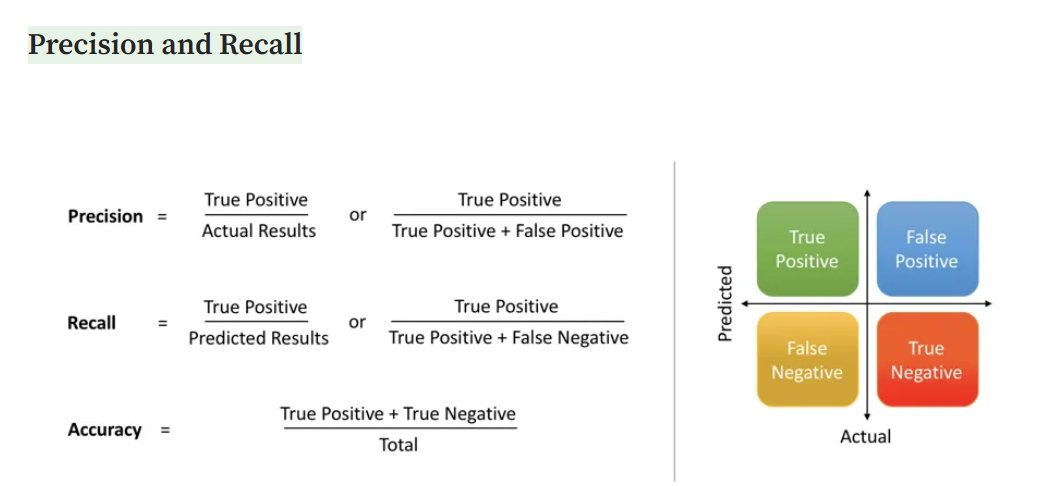


##### In summary:

->Precision is about the accuracy of positive predictions and is concerned with minimizing false positives. It is useful when the cost of false alarms is high.

->Recall is about the ability to capture all positive instances and is concerned with minimizing false negatives. It is essential when missing positive instances has significant consequences.

->Depending on your specific classification problem and the trade-offs between false positives and false negatives, you may need to optimize your model's performance with respect to precision, recall, or a balance between the two using techniques like threshold adjustment.

### Q2. What is the F1 score and how is it calculated? How is it different from precision and recall?

The F1 score is a single performance metric used to assess the quality of a binary classification model, particularly when dealing with imbalanced datasets or situations where both precision and recall are important. It combines both precision and recall into a single value, providing a balance between the two metrics.

##### Calculation of the F1 Score:

The F1 score is calculated using the formula: **2(Precision*Recall) / (Precision+Recall)**

**Precision:** Precision is the proportion of true positive predictions (correct positive predictions) to the total number of positive predictions made by the model. It measures the accuracy of positive predictions and is calculated as TP/(TP+FP).

**Recall:** Recall is the proportion of true positive predictions to the total number of actual positive instances in the dataset. It measures the model's ability to identify all relevant positive instances and is calculated as TP/(TP+FN).

The F1 score takes the harmonic mean of precision and recall, providing a balanced assessment of the model's performance. The harmonic mean gives more weight to lower values, making the F1 score sensitive to situations where either precision or recall is significantly lower than the other. As a result, the F1 score tends to penalize models that have a substantial imbalance between precision and recall.

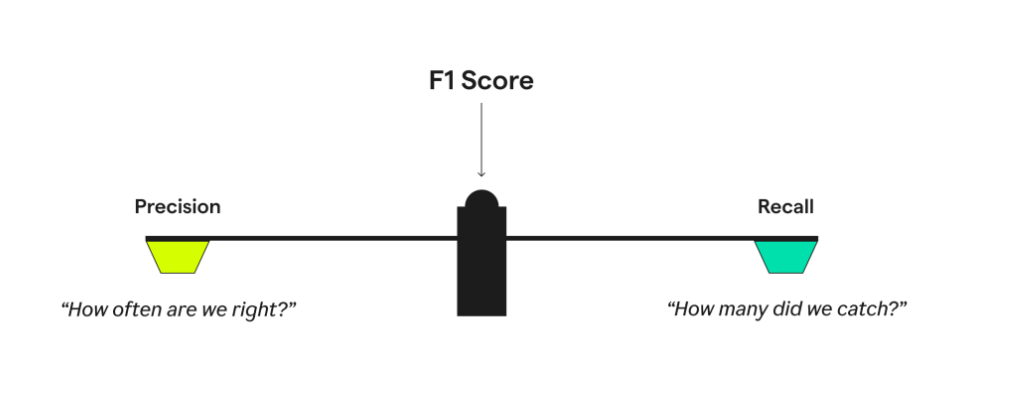

##### Differences Between F1 Score, Precision, and Recall:

1.F1 Score: The F1 score combines precision and recall into a single metric. It balances the trade-off between precision and recall and is especially useful when you want to assess a model's overall performance without favoring one metric over the other.

2.Precision: Precision measures the accuracy of positive predictions and is concerned with minimizing false positives. It answers the question: "Of all the instances predicted as positive, how many were correctly classified?"

3.Recall: Recall measures the model's ability to identify all relevant positive instances and is concerned with minimizing false negatives. It answers the question: "Of all the actual positive instances, how many did the model correctly classify?"

In summary, while precision and recall focus on specific aspects of a classification model's performance, the F1 score provides a balanced evaluation by considering both false positives and false negatives. The choice between using precision, recall, or the F1 score depends on the specific requirements and priorities of your classification problem.

### Q3. What is ROC and AUC, and how are they used to evaluate the performance of classification models?

ROC (Receiver Operating Characteristic) Curve and AUC (Area Under the ROC Curve) are widely used evaluation metrics for assessing the performance of binary classification models. They help visualize and quantify the model's ability to distinguish between the positive and negative classes, particularly when you vary the classification threshold.

#### ROC Curve:

1.Definition: The ROC curve is a graphical representation of a classification model's performance across different threshold settings. It plots the True Positive Rate (Recall) against the False Positive Rate at various threshold values.

2.Interpretation: The ROC curve shows the trade-off between the model's sensitivity (the ability to correctly identify positive instances) and its specificity (the ability to correctly identify negative instances) across different threshold levels. The curve is typically ascending, with better models having curves that rise steeply toward the upper-left corner, indicating high sensitivity and low false positive rates.

3.Usage: You can visually assess a model's performance by examining its ROC curve. A curve closer to the upper-left corner indicates better discrimination ability, while a diagonal line (representing random guessing) indicates poor discrimination. Models with curves below the diagonal line are worse than random guessing.

#### AUC (Area Under the ROC Curve):

1.Definition: The AUC is a numerical value that quantifies the overall performance of a classification model by measuring the area under its ROC curve. A perfect model has an AUC of 1, while a random model has an AUC of 0.5 (the diagonal line).

2.Interpretation: The AUC provides a single scalar value to assess the model's ability to distinguish between positive and negative instances. A higher AUC indicates better overall model performance. An AUC of 0.5 suggests that the model performs no better than random guessing, while an AUC greater than 0.5 indicates an improvement over random guessing.

3.Usage: Comparing the AUC values of different models allows you to determine which model has superior discrimination ability. Higher AUC values indicate better separation between the classes.

AUC Score: 0.4699


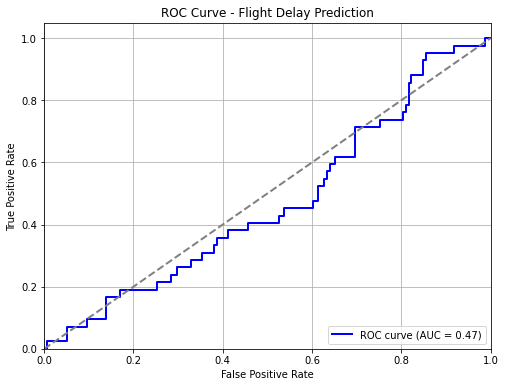

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Create a synthetic flight dataset
np.random.seed(42)
n_samples = 1000
data = {
    'flight_distance': np.random.normal(1000, 300, n_samples),  # distance in miles
    'departure_delay': np.random.normal(15, 10, n_samples),     # minutes
    'arrival_delay': np.random.normal(20, 15, n_samples),       # minutes
    'weather_delay': np.random.binomial(1, 0.1, n_samples),     # bad weather 0/1
}

df = pd.DataFrame(data)
df['delayed'] = (df['arrival_delay'] > 30).astype(int)  # target variable: delayed or not

# Features and target
X = df[['flight_distance', 'departure_delay', 'weather_delay']]
y = df['delayed']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Flight Delay Prediction')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Q4. How do you choose the best metric to evaluate the performance of a classification model?

Ans)Some common evaluation metrics for classification models and guidelines on how to choose the most appropriate one:

#### Accuracy:

When to Use: Accuracy is suitable when the class distribution is balanced (approximately equal instances of each class). It measures the overall correctness of predictions.
Considerations: Accuracy can be misleading when dealing with imbalanced datasets, where one class significantly outnumbers the other. In such cases, high accuracy can be achieved by simply predicting the majority class, even if the model fails to detect the minority class.

####  Precision and Recall:

When to Use: Use precision when minimizing false positives (Type I errors) is critical, and you want to assess the accuracy of positive predictions. Use recall when minimizing false negatives (Type II errors) is crucial, and you want to ensure that all relevant positive instances are captured.
Considerations: Precision and recall are often used together to assess a model's ability to balance Type I and Type II errors. You may need to make a trade-off between precision and recall based on the problem's context.

#### F1-Score:

When to Use: The F1-score is useful when you want to balance precision and recall and obtain a single metric that combines both. It's particularly valuable in scenarios where precision and recall have trade-offs.
Considerations: The F1-score can be a better choice than accuracy when dealing with imbalanced datasets, where one class is much smaller than the other.

#### ROC Curve and AUC:

When to Use: ROC curves and AUC are valuable when you want to assess a model's discrimination ability across various threshold settings and prioritize the trade-off between true positives and false positives.
Considerations: These metrics are suitable for imbalanced datasets and help you choose an appropriate threshold based on your problem's requirements.

#### Specificity:

When to Use: Specificity measures a model's ability to correctly identify the negative class. It's useful when minimizing false positives in the negative class is essential.
Considerations: Specificity is particularly relevant in applications where the cost of false negatives in the negative class is high.

#### Balanced Accuracy:

When to Use: Balanced accuracy is useful when the class distribution is imbalanced. It calculates the average of recall for each class, considering class-specific performance.
Considerations: Balanced accuracy provides a fair evaluation when class sizes differ significantl

### Q5 What is multiclass classification and how is it different from binary classification?

**Multiclass classification** is a type of machine learning problem where the goal is to classify inputs into one of three or **more distinct categories**. For example, given a picture of a fruit, a model could predict whether it is an apple, a banana, or an orange. This is different from **binary classification**, where the task is to choose between **only two classes**, such as predicting whether an email is spam or not spam, or whether a transaction is fraudulent or not.

In binary classification, the output is one of two possible labels, usually represented as 0 and 1. In multiclass classification, the output could be one of several labels, and the model must determine which one is the most appropriate based on the input features. 

Multiclass classification problems typically use algorithms like softmax regression, decision trees, random forests, or neural networks, while binary classification problems often use logistic regression, support vector machines (SVM), or simpler neural networks with a sigmoid activation.

Another key difference is in the way probabilities are handled: binary classifiers often predict a single probability (like the chance of being positive), whereas multiclass classifiers distribute probabilities across all possible classes, with the total adding up to 1. Understanding whether a problem is binary or multiclass helps determine the appropriate modeling techniques, evaluation metrics, and interpretation of results.

### Q6. Explain how logistic regression can be used for multiclass classification.

Ans) **Logistic regression**, while originally designed for binary classification, can also be extended to handle **multiclass classification** problems using strategies like one-vs-rest (OvR) or multinomial logistic regression. In the **one-vs-rest approach**, the model builds one binary classifier for each class, treating that class as "positive" and all other classes as "negative." 

During prediction, the class whose classifier outputs the highest probability is selected. Another method is **multinomial logistic regression**, which directly models the probability of each class using a softmax function instead of the **sigmoid function**. The **softmax function** calculates probabilities across all classes such that they sum to 1, and the model picks the class with the highest probability. In Scikit-learn (sklearn), logistic regression supports both methods, and you can choose the multinomial option by setting multi_class='multinomial' and using a solver like 'lbfgs'. 

Thus, logistic regression becomes a powerful and simple tool for multiclass problems as well, not just binary ones.

### Q7. Describe the steps involved in an end-to-end project for multiclass classification.

### Steps involved in an end-to-end project for multiclass classification are :

#### 1. Problem Definition and Data Collection:

Clearly define the multiclass classification problem you want to solve and understand the business or research objectives.
Gather a labeled dataset that includes features (attributes) and class labels for each instance. Ensure the data is representative of the problem domain.

#### 2.Data Preprocessing:

Explore and understand the dataset by performing data analysis and visualization to identify patterns, distributions, and outliers.
Clean the data by handling missing values, outliers, and anomalies.
Perform feature engineering, which may include feature selection, transformation, or creation of new features to improve model performance.

#### 3.Data Splitting:

Split the dataset into three subsets: training, validation, and test sets. Common splits include 70-80% for training, 10-15% for validation, and 10-15% for testing.
Ensure that class distributions are balanced across the splits to prevent bias.

#### 4.Model Selection:

Choose an appropriate machine learning algorithm or model architecture for multiclass classification. Options include logistic regression, decision trees, random forests, support vector machines, neural networks, and more.
Consider the characteristics of your data, model complexity, and interpretability when selecting the model.

#### 5.Model Training:

Train the selected model using the training dataset. This involves feeding the features and corresponding class labels into the model and adjusting its parameters to minimize a loss function.
Experiment with hyperparameter tuning and cross-validation to optimize the model's performance.

#### 6.Model Evaluation:

Assess the model's performance using the validation dataset and appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
Utilize techniques like a confusion matrix or ROC curves for a deeper analysis of model errors.
Consider adjusting the model or features based on evaluation results.

#### 7.Model Optimization:

Fine-tune the model by modifying hyperparameters, using different algorithms, or addressing issues like overfitting or underfitting.
Continue iterating on the model and validation until you achieve satisfactory performance.

#### 8.Final Model Testing:

Evaluate the final model's performance on the test dataset to estimate its generalization ability to new, unseen data.
Ensure that the test dataset is completely separate from the training and validation datasets.

#### 9.Model Deployment:

Deploy the trained multiclass classification model in a production environment, making it accessible for making predictions on new data.
Implement robust and scalable deployment strategies, such as containerization, cloud deployment, or integration with existing systems.

#### 10.Monitoring and Maintenance:

Continuously monitor the model's performance in production to detect any drift or degradation in accuracy.
Implement regular model retraining or updates as new data becomes available or as business requirements change.

#### 11.Documentation and Reporting:

Document all aspects of the project, including data preprocessing steps, model architecture, hyperparameters, and evaluation metrics.
Create clear and concise reports or documentation to communicate results, findings, and recommendations to stakeholders.

### Q8. What is model deployment and why is it important?

**Model deployment** is the process of taking a trained machine learning model and making it available for real-world use, typically by integrating it into a production environment where it can receive new data and make predictions. Deployment can involve creating APIs, embedding models into applications, or setting up automated systems where the model continuously processes live data. Without deployment, a model stays locked in a lab environment and cannot deliver practical value to users or businesses.

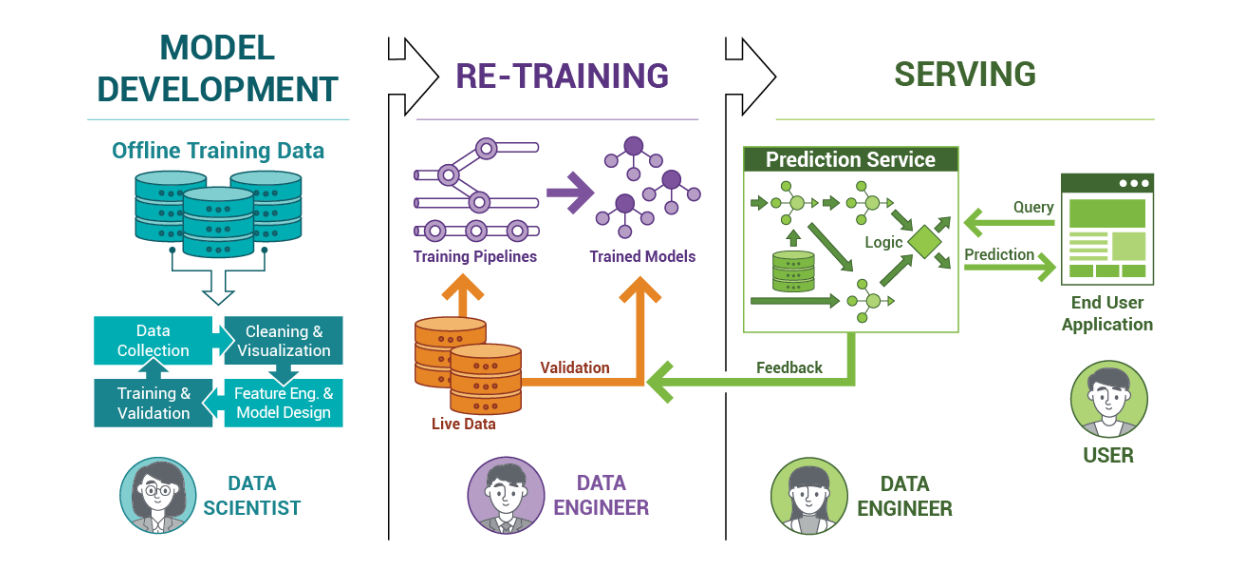

Deployment is important because it transforms machine learning from a theoretical exercise into something that solves real-world problems. A good deployment ensures that the model remains scalable, reliable, and accessible for end users. It also involves monitoring the model’s performance over time to catch any issues like data drift or model degradation, and updating the model when needed to maintain accuracy and effectiveness.

### Q9. Explain how multi-cloud platforms are used for model deployment.

Multi-cloud platforms refer to using multiple cloud service providers (like AWS, Azure, Google Cloud, IBM Cloud, etc.) at the same time to deploy and manage machine learning models. In model deployment, multi-cloud strategies allow organizations to run their models across different clouds **based on cost, performance, geographic location, or specific service advantages**. For example, a company might train a model on Google Cloud (because of advanced AI tools) but deploy it on AWS (for faster delivery to users worldwide).

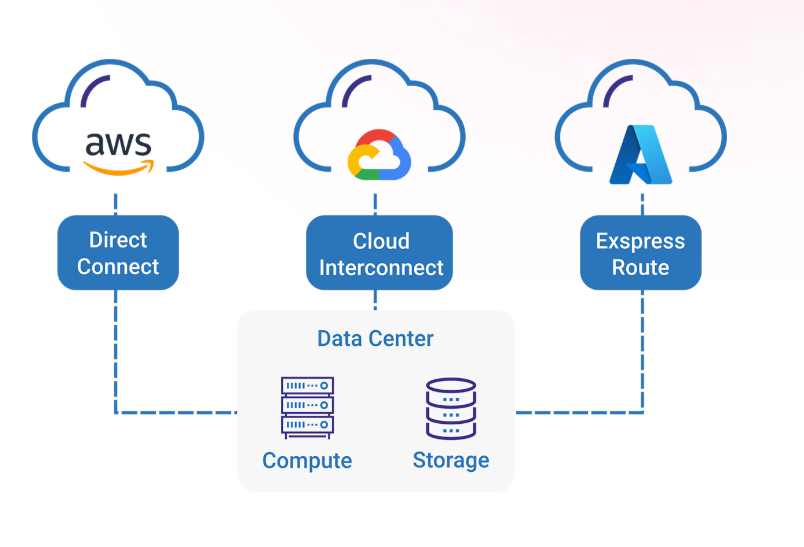

Using multi-cloud platforms for model deployment is important because it gives businesses **flexibility, reduces risk of vendor lock-in, and increases system reliability**. If one cloud provider faces an outage or performance issue, the model can still serve users through another provider. Additionally, different clouds might offer unique machine learning services — companies can mix and match to optimize for cost, speed, and compliance needs. Overall, multi-cloud deployment helps make machine learning applications more resilient, scalable, and future-proof.

### Q10. Discuss the benefits and challenges of deploying machine learning models in a multi-cloud environment.

### Ans)Benefits of Multi-Cloud Model Deployment:

#### Redundancy and High Availability:

**Benefit:** Multi-cloud deployment provides redundancy and high availability. If one cloud provider experiences downtime, the model can continue to function from resources on another provider's infrastructure.   
Example: An e-commerce platform ensures that its recommendation model remains available even if one cloud provider experiences an outage during a major shopping event.

#### Performance Optimization:

**Benefit:** By strategically placing model-serving resources in different regions, organizations can reduce latency and improve the user experience for a global audience.   
Example: A video streaming service uses multi-cloud deployment to ensure viewers in different countries experience minimal buffering and fast playback.

#### Cost Optimization:

**Benefit:** Organizations can choose the most cost-effective cloud provider for different components of model deployment, resulting in cost savings.   
Example: A data-intensive research project leverages one cloud provider's cost-effective storage solution while using another provider for GPU-accelerated model training.  

#### Vendor Diversification:  

**Benefit:** Multi-cloud deployment mitigates the risk of vendor lock-in, allowing organizations to maintain flexibility and switch providers if necessary.  
Example: An enterprise opts for multi-cloud to avoid being tied to a single cloud provider's ecosystem, enabling future migration or expansion options.

#### Compliance and Data Residency:  

**Benefit:** Multi-cloud platforms facilitate compliance with data residency regulations by enabling data and model deployment in regions that align with legal requirements.    
Example: A healthcare provider deploys patient data analysis models in regions where data privacy regulations are strictly enforced.

### Challenges of Multi-Cloud Model Deployment:

####  Complexity and Management:

**Challenge:** Managing resources, security, and configurations across multiple cloud providers can be complex and require additional expertise.   
Example: Orchestrating deployments and ensuring consistent security measures across different cloud environments can be challenging.

#### Cost Tracking and Optimization:

**Challenge:** Cost tracking becomes more complex as resources are spread across multiple providers, making it essential to monitor and optimize costs effectively.    
Example: Keeping track of spending and optimizing resource allocation across multiple providers can require dedicated cost management efforts.

#### Interoperability and Compatibility:

**Challenge:** Ensuring compatibility and interoperability between different cloud providers' services and APIs may require extra effort and development.   
Example: Integrating services and data pipelines from different cloud providers while maintaining consistency can be challenging.

#### Data Synchronization and Consistency:

**Challenge:** Ensuring data consistency and synchronization across multiple cloud environments can be complex, especially for real-time applications.     
Example: A financial institution faces challenges in maintaining consistent transaction records when deploying financial fraud detection models on multiple clouds.

#### Security and Compliance:

**Challenge:** Implementing robust security measures and ensuring compliance with regulations across multiple providers demands careful planning and monitoring.    
Example: Meeting stringent security requirements while deploying sensitive customer data models across multiple cloud environments is a complex task.    

**In summary,** multi-cloud model deployment offers valuable benefits, including redundancy, performance optimization, cost savings, vendor diversification, and compliance support. However, it also introduces challenges related to complexity, cost tracking, interoperability, data management, and security. Organizations must carefully weigh these pros and cons when deciding to adopt a multi-cloud strategy for model deployment and implement appropriate strategies to mitigate challenges effectively.